<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA. 


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 182.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 163.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 152.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 128.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 89.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 152.5 MB/s eta 0:00:00


#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [2]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [3]:
# Check for missing values in critical columns
print(df[['Employment', 'JobSat', 'RemoteWork']].isnull().sum())

# Handle missing values
# Fill missing values with a placeholder or mode
df['Employment'] = df['Employment'].fillna('Unknown')
df['JobSat'] = df['JobSat'].fillna(df['JobSat'].mode()[0])  # Fill with most frequent value
df['RemoteWork'] = df['RemoteWork'].fillna('Unknown')


# Verify missing values are handled
print("\nMissing values after handling:")
print(df[['Employment', 'JobSat', 'RemoteWork']].isnull().sum())

Employment        0
JobSat        36311
RemoteWork    10631
dtype: int64

Missing values after handling:
Employment    0
JobSat        0
RemoteWork    0
dtype: int64


#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


Unique values in JobSat and their counts (including NaN):
JobSat
8.0     43820
7.0      6379
6.0      3751
9.0      3626
10.0     2251
5.0      1956
3.0      1165
4.0      1130
2.0       772
0.0       311
1.0       276
Name: count, dtype: int64

Number of rows before dropping NaN in JobSat: 65437
Number of rows after dropping NaN in JobSat: 65437

Number of NaN values in JobSatNumeric:
65437

JobSat values causing NaN in JobSatNumeric:
[ 8.  5. 10.  6.  9.  4.  7.  3.  2.  1.  0.]

Distribution of JobSatNumeric:
JobSatNumeric
3.0    65437
Name: count, dtype: int64

Median Job Satisfaction by Experience Range:
  ExperienceRange  JobSatNumeric
0             0-5            3.0
1            5-10            3.0
2           10-20            3.0
3             >20            3.0


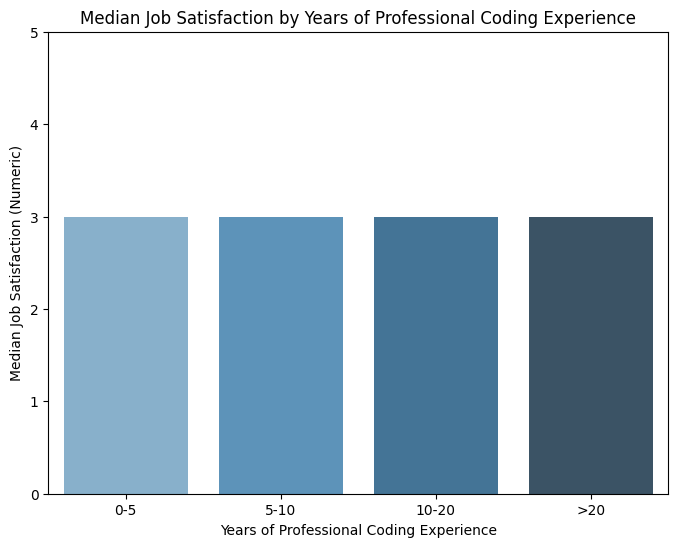

In [4]:
# Step 4: Analysis of Experience and Job Satisfaction

# Ensure 'YearsCodePro' is numeric, handling non-numeric values
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Create experience ranges
bins = [0, 5, 10, 20, float('inf')]
labels = ['0-5', '5-10', '10-20', '>20']
df['ExperienceRange'] = pd.cut(df['YearsCodePro'], bins=bins, labels=labels, include_lowest=True)

# Inspect unique values in JobSat to identify all categories
print("Unique values in JobSat and their counts (including NaN):")
print(df['JobSat'].value_counts(dropna=False))

# Handle missing JobSat values by dropping NaN
print("\nNumber of rows before dropping NaN in JobSat:", len(df))
df = df.dropna(subset=['JobSat']).copy()  # Drop rows with NaN in JobSat
print("Number of rows after dropping NaN in JobSat:", len(df))

# Define JobSat mapping
job_sat_mapping = {
    'Very satisfied': 5,
    'Slightly satisfied': 4,
    'Neither satisfied nor dissatisfied': 3,
    'Slightly dissatisfied': 2,
    'Very dissatisfied': 1
    # Add more mappings if needed based on unique values
}

# Map JobSat to numeric values
df['JobSatNumeric'] = df['JobSat'].map(job_sat_mapping)

# Check for NaN in JobSatNumeric
print("\nNumber of NaN values in JobSatNumeric:")
print(df['JobSatNumeric'].isna().sum())

# If NaN values exist, identify unmapped JobSat values
if df['JobSatNumeric'].isna().any():
    print("\nJobSat values causing NaN in JobSatNumeric:")
    print(df[df['JobSatNumeric'].isna()]['JobSat'].unique())
    # Update mapping or fill NaN as a fallback
    df['JobSatNumeric'] = df['JobSatNumeric'].fillna(3)  # Fallback: fill NaN with neutral score

# Check JobSatNumeric distribution
print("\nDistribution of JobSatNumeric:")
print(df['JobSatNumeric'].value_counts(dropna=False))

# Group by experience range and calculate median JobSat with observed=False
median_jobsat = df.groupby('ExperienceRange', observed=False)['JobSatNumeric'].median().reset_index()

# Print median JobSat for each range
print("\nMedian Job Satisfaction by Experience Range:")
print(median_jobsat)

# Visualize the relationship using a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='ExperienceRange', y='JobSatNumeric', data=median_jobsat, hue='ExperienceRange', palette='Blues_d')
plt.title('Median Job Satisfaction by Years of Professional Coding Experience')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Median Job Satisfaction (Numeric)')
plt.ylim(0, 5)  # Assuming 1-5 scale for JobSat
plt.show()

#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


Dataset shape: (65437, 116)
First few rows of JobSat:
0    8.0
1    8.0
2    8.0
3    8.0
4    8.0
Name: JobSat, dtype: float64

Unique values in JobSat and their counts (including NaN):
JobSat
8.0     43820
7.0      6379
6.0      3751
9.0      3626
10.0     2251
5.0      1956
3.0      1165
4.0      1130
2.0       772
0.0       311
1.0       276
Name: count, dtype: int64

Percentage distribution of JobSat:
JobSat
8.0     66.965173
7.0      9.748308
6.0      5.732231
9.0      5.541208
10.0     3.439950
5.0      2.989135
3.0      1.780338
4.0      1.726852
2.0      1.179761
0.0      0.475266
1.0      0.421780
Name: proportion, dtype: float64

Number of rows in df_clean: 65437

Unique values in JobSat after filling NaN:
JobSat
8.0     43820
7.0      6379
6.0      3751
9.0      3626
10.0     2251
5.0      1956
3.0      1165
4.0      1130
2.0       772
0.0       311
1.0       276
Name: count, dtype: int64


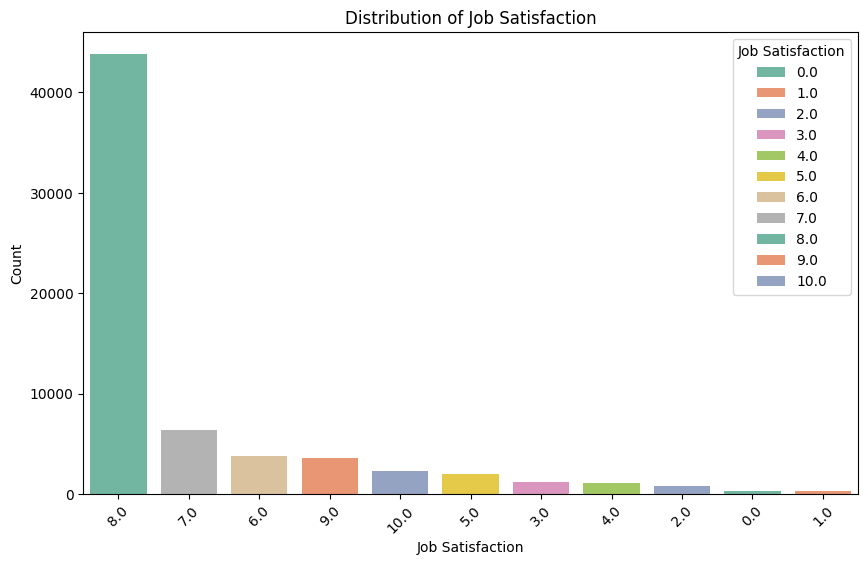

In [6]:
# Step 5: Visualize Job Satisfaction

# Verify dataset is loaded
print("Dataset shape:", df.shape)
print("First few rows of JobSat:")
print(df['JobSat'].head())

# Inspect JobSat to understand its distribution
print("\nUnique values in JobSat and their counts (including NaN):")
print(df['JobSat'].value_counts(dropna=False))
print("\nPercentage distribution of JobSat:")
print(df['JobSat'].value_counts(normalize=True, dropna=False) * 100)

# Handle missing JobSat values by filling (to avoid empty DataFrame)
df_clean = df.copy()  # Create a copy to avoid modifying original df
print("\nNumber of rows in df_clean:", len(df_clean))
df_clean['JobSat'] = df_clean['JobSat'].fillna('Unknown')  # Fill NaN with 'Unknown'

# Re-inspect JobSat after filling
print("\nUnique values in JobSat after filling NaN:")
print(df_clean['JobSat'].value_counts(dropna=False))

# Create a count plot for JobSat distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df_clean, x='JobSat', hue='JobSat', palette='Set2', order=df_clean['JobSat'].value_counts().index)
plt.title('Distribution of Job Satisfaction')
plt.xlabel('Job Satisfaction')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Job Satisfaction', loc='upper right')
plt.show()

#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


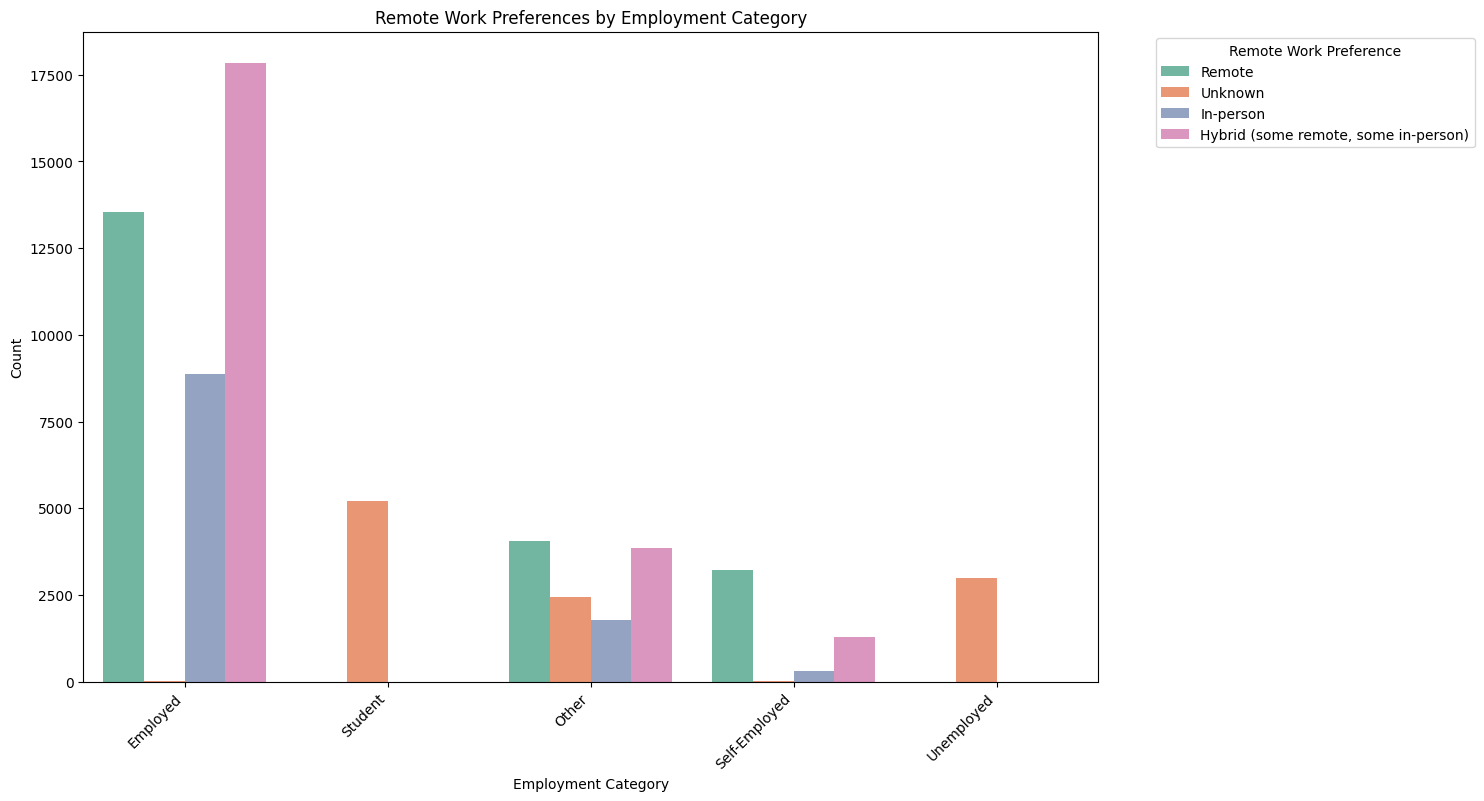

In [10]:
import pandas as pd

#mapping for broader employment groupings
employment_grouping = {
    'Employed, full-time': 'Employed',
    'Employed, part-time': 'Employed',
    'Independent contractor, freelancer, or self-employed': 'Self-Employed',
    'Retired': 'Other',
    'Student, full-time': 'Student',
    'Student, part-time': 'Student',
    'Not employed, but looking for work': 'Unemployed',
    'Not employed, and not looking for work': 'Unemployed',

}

# Apply the grouping to your DataFrame
df['EmploymentGroup'] = df['Employment'].map(employment_grouping).fillna('Other')

import matplotlib.pyplot as plt
import seaborn as sns

# Create the plot with grouped employment types
plt.figure(figsize=(14, 10))  # Larger figure size for more space
sns.countplot(data=df, x='EmploymentGroup', hue='RemoteWork', palette='Set2')
plt.title('Remote Work Preferences by Employment Category')
plt.xlabel('Employment Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability

# Move the legend outside the plot
plt.legend(title='Remote Work Preference', bbox_to_anchor=(1.05, 1), loc='upper left')

# Manually adjust margins to fit all elements
plt.subplots_adjust(bottom=0.25, top=0.9, right=0.85)

plt.show()

#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


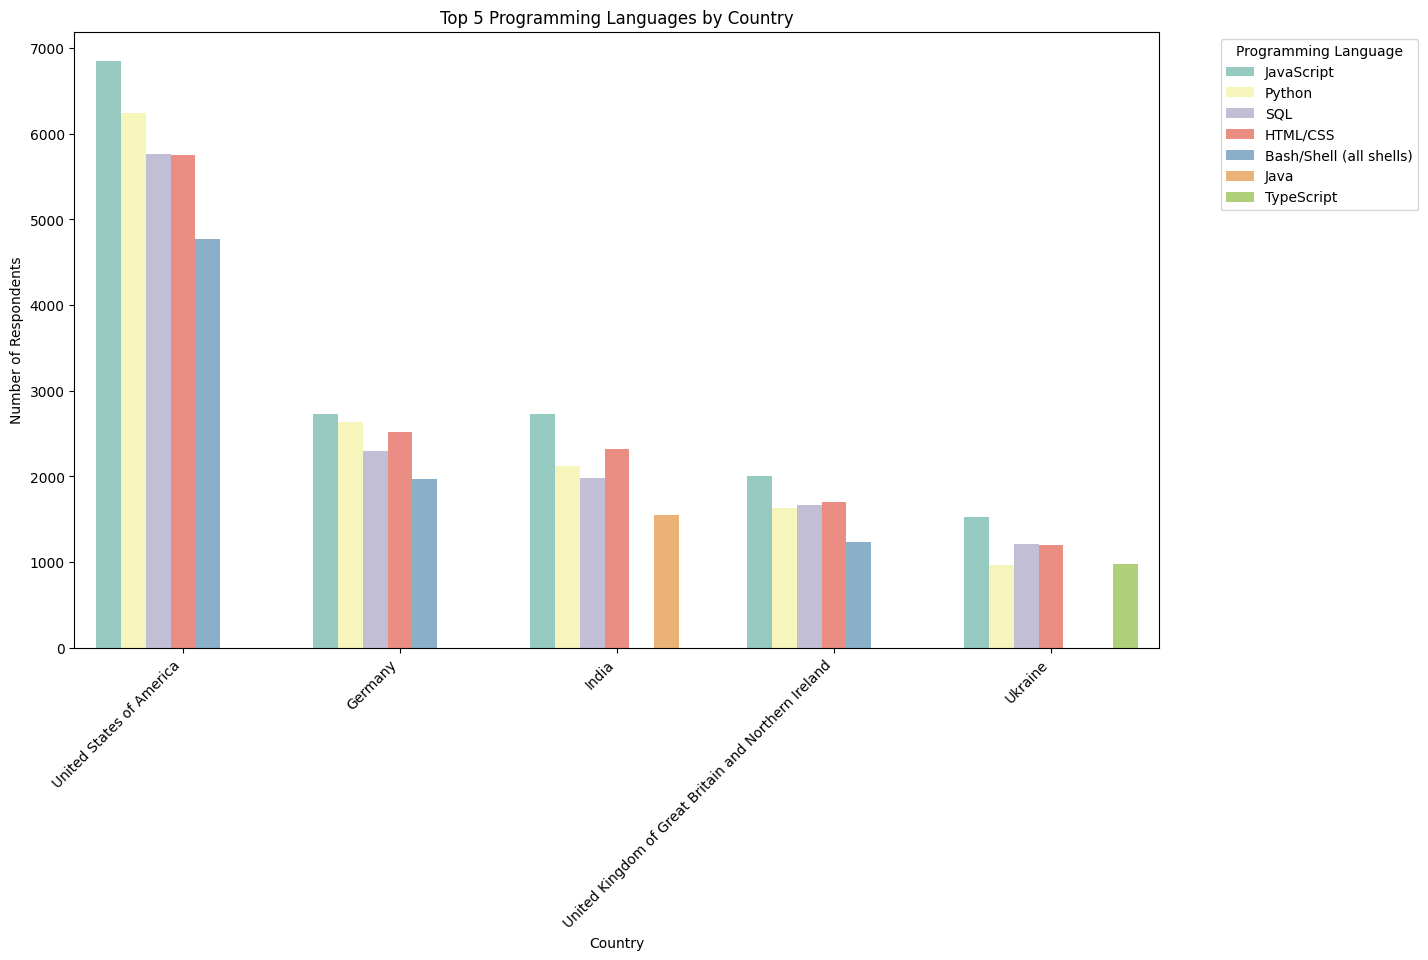

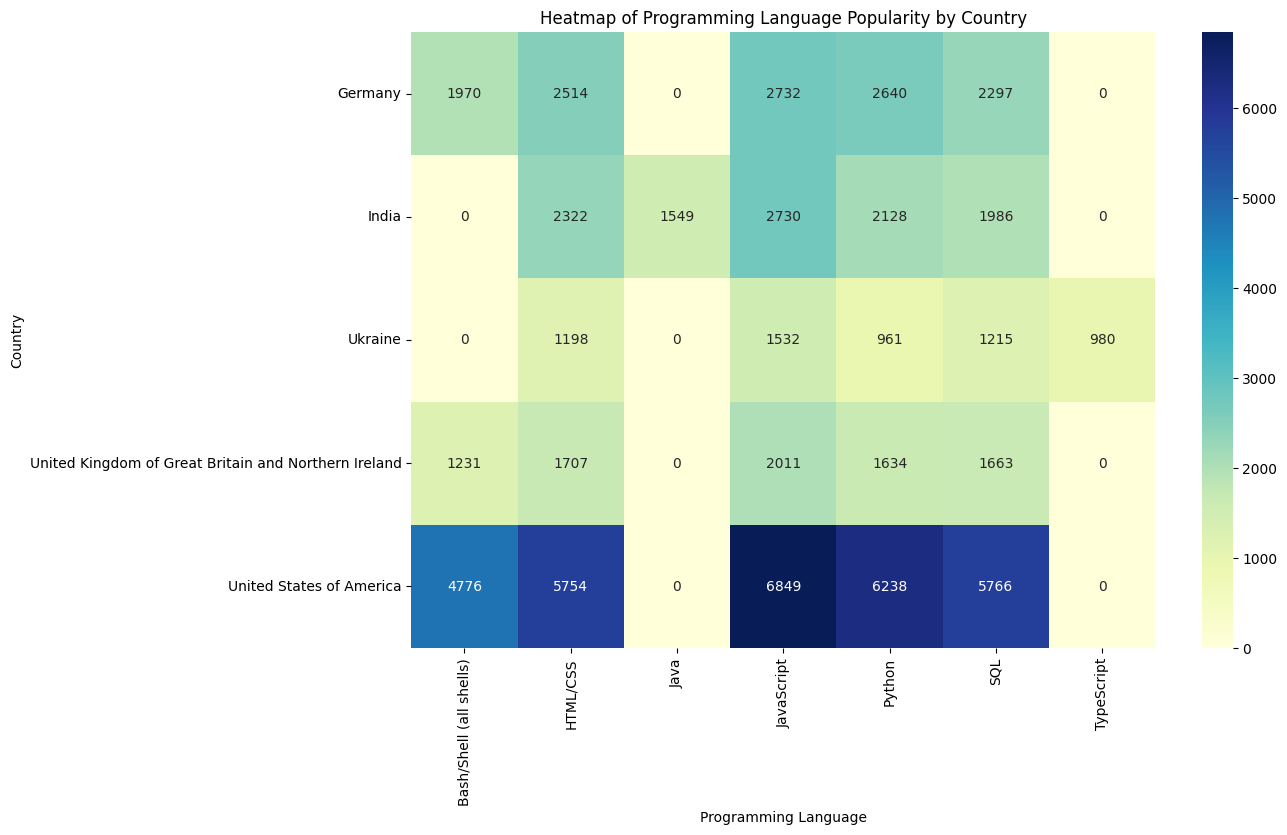

In [11]:
# Split 'LanguageHaveWorkedWith' into individual languages
df['Languages'] = df['LanguageHaveWorkedWith'].str.split(';')

# Explode the 'Languages' column
df_exploded = df.explode('Languages')

# Group by 'Country' and count language frequency
language_counts = df_exploded.groupby('Country')['Languages'].value_counts().reset_index(name='Count')

# Get the top 5 languages for each country
language_counts_sorted = language_counts.sort_values('Count', ascending=False)
top_languages = language_counts_sorted.groupby('Country').head(5).reset_index(drop=True)

# Select top 5 countries by respondent count
top_countries = df['Country'].value_counts().head(5).index
filtered_data = top_languages[top_languages['Country'].isin(top_countries)]

# Bar Plot: Top 5 languages in selected countries
plt.figure(figsize=(14, 8))
sns.barplot(data=filtered_data, x='Country', y='Count', hue='Languages', palette='Set3')
plt.title('Top 5 Programming Languages by Country')
plt.xlabel('Country')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Programming Language', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Heatmap: Language popularity across regions
heatmap_data = filtered_data.pivot(index='Country', columns='Languages', values='Count').fillna(0)
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='g')
plt.title('Heatmap of Programming Language Popularity by Country')
plt.xlabel('Programming Language')
plt.ylabel('Country')
plt.show()

#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


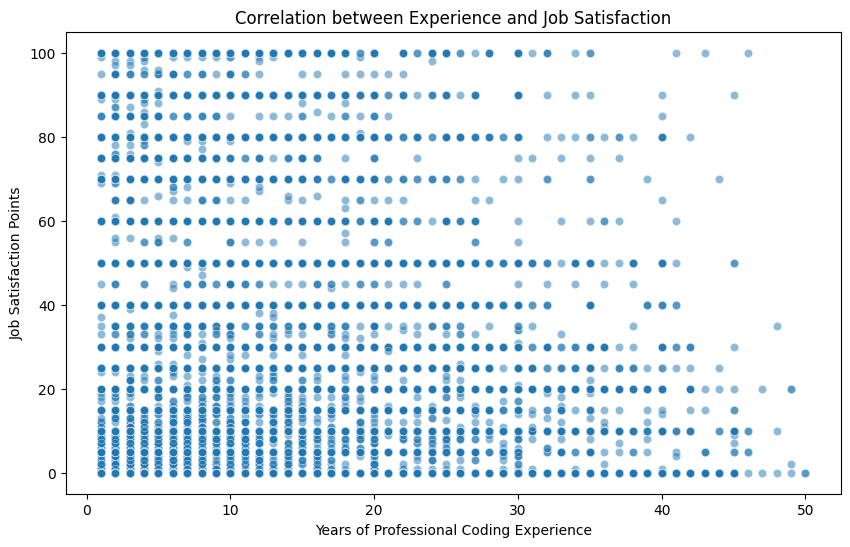

In [12]:
## Write your code here
# Check if required columns exist in the DataFrame
required_columns = ['YearsCodePro', 'JobSatPoints_1']
for col in required_columns:
    if col not in df.columns:
        print(f"Error: Column '{col}' is missing from the dataset.")
        break
else:
    # Ensure 'YearsCodePro' is numeric, converting any non-numeric values to NaN
    df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')
    
    # Assuming 'JobSatPoints_1' is already numeric as per lab context
    
    # Drop rows with NaN in 'YearsCodePro' or 'JobSatPoints_1'
    df_plot = df.dropna(subset=['YearsCodePro', 'JobSatPoints_1'])
    
    # Check if there are data points to plot after dropping NaN
    if df_plot.empty:
        print("No data points to plot after dropping NaN values.")
    else:
        # Create scatter plot with transparency for overlapping points
        plt.figure(figsize=(10, 6))
        sns.scatterplot(data=df_plot, x='YearsCodePro', y='JobSatPoints_1', alpha=0.5)
        
        # Add titles and labels
        plt.title('Correlation between Experience and Job Satisfaction')
        plt.xlabel('Years of Professional Coding Experience')
        plt.ylabel('Job Satisfaction Points')
        
        # Display the plot
        plt.show()

#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


Number of rows after dropping missing values: 65437
Cross-tabulation (proportions):
EmploymentGroup  Employed     Other  Self-Employed   Student  Unemployed
EdLevelGroup                                                            
Associate        0.612381  0.209704       0.079755  0.051868    0.046291
Bachelor’s       0.689800  0.160412       0.063828  0.040935    0.045024
Elementary       0.162304  0.267016       0.049738  0.405759    0.115183
High School      0.271362  0.284999       0.063352  0.320387    0.059900
Master’s         0.728482  0.139101       0.086199  0.017034    0.029183
Other            0.607013  0.188662       0.072238  0.081707    0.050380
Some College     0.486211  0.260750       0.095151  0.105084    0.052804


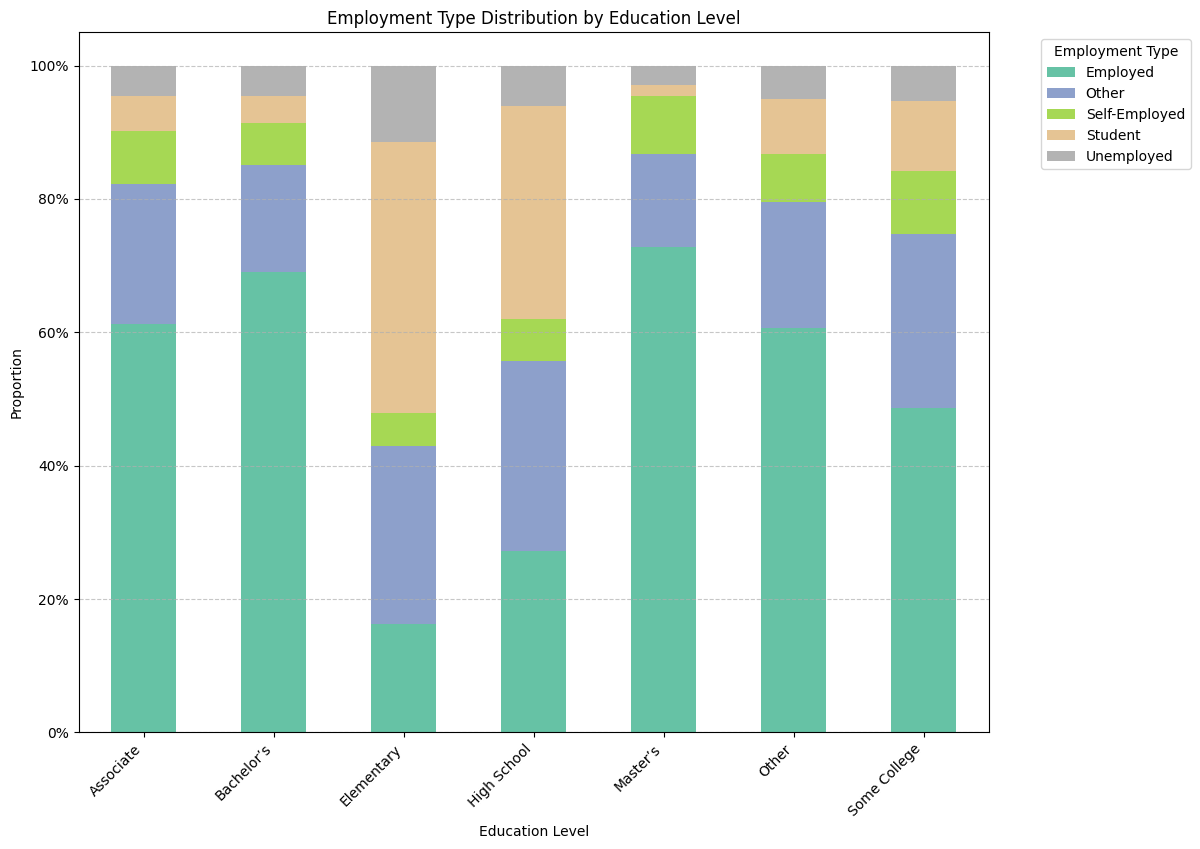

In [15]:
# Step 9: Educational Background and Employment Type

# Import required libraries (assuming already imported in the lab environment)
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

# Check if required columns exist
if 'EdLevel' not in df.columns or 'Employment' not in df.columns:
    print("Error: Required columns 'EdLevel' and/or 'Employment' are missing.")
else:
    # Define broad groupings for EdLevel
    edlevel_mapping = {
        'Bachelor’s degree (B.A., B.S., B.Eng., etc.)': 'Bachelor’s',
        'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)': 'Master’s',
        'Some college/university study without earning a degree': 'Some College',
        'Associate degree (A.A., A.S., etc.)': 'Associate',
        'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)': 'High School',
        'Professional degree (JD, MD, etc.)': 'Professional',
        'Other doctoral degree (Ph.D., Ed.D., etc.)': 'Doctorate',
        'Primary/elementary school': 'Elementary',
        'Something else': 'Other'
    }

    # Define broad groupings for Employment
    employment_mapping = {
        'Employed, full-time': 'Employed',
        'Employed, part-time': 'Employed',
        'Independent contractor, freelancer, or self-employed': 'Self-Employed',
        'Not employed, but looking for work': 'Unemployed',
        'Not employed, and not looking for work': 'Unemployed',
        'Student, full-time': 'Student',
        'Student, part-time': 'Student',
        'Retired': 'Other',
        'Unknown': 'Other'
    }

    # Apply groupings
    df_clean = df.copy()
    df_clean['EdLevelGroup'] = df_clean['EdLevel'].map(edlevel_mapping).fillna('Other')
    df_clean['EmploymentGroup'] = df_clean['Employment'].map(employment_mapping).fillna('Other')

    # Drop rows with missing values in grouped columns
    df_clean = df_clean.dropna(subset=['EdLevelGroup', 'EmploymentGroup'])
    print(f"Number of rows after dropping missing values: {len(df_clean)}")

    # Create normalized cross-tabulation
    ct = pd.crosstab(df_clean['EdLevelGroup'], df_clean['EmploymentGroup'], normalize='index')
    print("Cross-tabulation (proportions):")
    print(ct)

    # Plot stacked bar plot
    plt.figure(figsize=(14, 10))
    ct.plot(kind='bar', stacked=True, ax=plt.gca(), colormap='Set2')
    plt.title('Employment Type Distribution by Education Level')
    plt.xlabel('Education Level')
    plt.ylabel('Proportion')
    plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Employment Type', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.subplots_adjust(left=0.1, right=0.75, top=0.9, bottom=0.2)  # Manual margin adjustment
    plt.show()

#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [16]:
## Write your code here
# Step 10: Save the Cleaned and Analyzed Dataset

# Import required library (already imported in lab environment)
import pandas as pd

# Verify DataFrame state
print("Dataset shape:", df.shape)
print("Columns in dataset:", df.columns.tolist())

# Ensure the DataFrame is not empty
if df.empty:
    print("Error: The DataFrame is empty. Cannot save.")
else:
    # Define the output file path
    output_file = "cleaned_survey_data.csv"
    
    try:
        # Save the DataFrame to a CSV file
        df.to_csv(output_file, index=False)
        print(f"Dataset successfully saved to '{output_file}'")
        
        # Verify the saved file by reading it back (optional)
        saved_df = pd.read_csv(output_file)
        print(f"Verification: Saved file has {saved_df.shape[0]} rows and {saved_df.shape[1]} columns")
    except Exception as e:
        print(f"Error saving the dataset: {str(e)}")

Dataset shape: (65437, 118)
Columns in dataset: ['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check', 'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline', 'TechDoc', 'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'BuildvsBuy', 'TechEndorse', 'Country', 'Currency', 'CompTotal', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'LanguageAdmired', 'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'DatabaseAdmired', 'PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'PlatformAdmired', 'WebframeHaveWorkedWith', 'WebframeWantToWorkWith', 'WebframeAdmired', 'EmbeddedHaveWorkedWith', 'EmbeddedWantToWorkWith', 'EmbeddedAdmired', 'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith', 'MiscTechAdmired', 'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith', 'ToolsTechAdmired', 'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'NEWCollabToolsAdmired', 'OpSysPersonal use', 'OpSysProfessional use', 'OfficeStackAsyncHa

<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
